<a href="https://colab.research.google.com/github/DennisCeballos/TF_ClusterCovidPeru/blob/main/sistintel_pruebastrabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partiendo del ejemplo del profe para pruebas

Importacion de librerias (extraído de ejemploProfesor)



In [ ]:
import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#Carga de archivos
Codigo que solicita subir un archivo csv

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TB_SEGUIM_COVID19_preprocesado.csv to TB_SEGUIM_COVID19_preprocesado.csv
User uploaded file "TB_SEGUIM_COVID19_preprocesado.csv" with length 2604808 bytes


In [ ]:
#Guardar los datos en una variable
filename = list(uploaded.keys())[0]
file_content = uploaded[filename].decode('utf-8')

## Impresion de carga

In [ ]:
#Cargar los datos a panda
df = pd.read_csv(io.StringIO(file_content))
df.head(100)

,evolucion_alta_1,evolucion_defuncion_1,evolucion_desfavorable_1,evolucion_estacionario_1,evolucion_favorable_1,evolucion_referido_1,con_oxigeno_1,con_ventilacion_1,esta_uci_1,esta_ucin_1,...,evolucion_alta_4,evolucion_defuncion_4,evolucion_desfavorable_4,evolucion_estacionario_4,evolucion_favorable_4,evolucion_referido_4,con_oxigeno_4,con_ventilacion_4,esta_uci_4,esta_ucin_4
0,False,False,True,False,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
1,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
2,False,False,True,False,False,False,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,1.0,0.0,0.0,0.0
3,False,False,True,False,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
4,False,False,False,False,True,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,1.0,0.0,0.0,0.0
96,False,False,False,False,True,False,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0
97,False,False,False,True,False,False,1.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0
98,False,False,False,True,False,False,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,0.0,0.0,0.0,0.0


#~Limpieza de datos~
(El dataset del profesor ya se encuentra formateado)


#Normalización de los Datos

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Tecnica de Clustering
Aplicar algun metodo de clustering

Determinar el Número Óptimo de Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

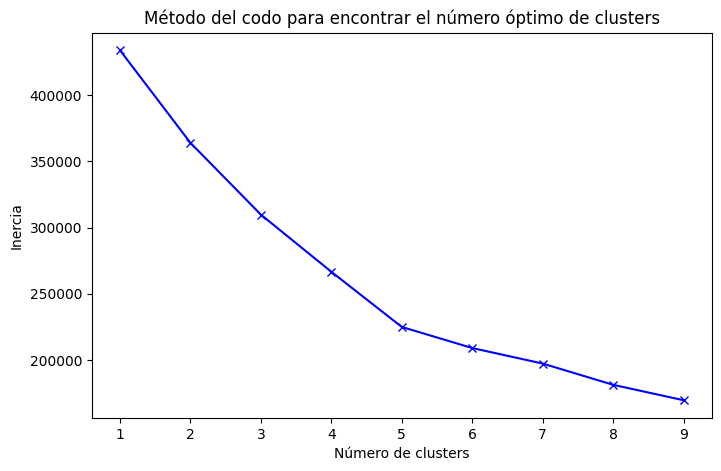

In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


Asumiendo que el método del codo indica que 3 clusters es óptimo.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   evolucion_alta_1  evolucion_defuncion_1  evolucion_desfavorable_1  \
0             False                  False                      True   
1             False                  False                     False   
2             False                  False                      True   
3             False                  False                      True   
4             False                  False                     False   

   evolucion_estacionario_1  evolucion_favorable_1  evolucion_referido_1  \
0                     False                  False                 False   
1                      True                  False                 False   
2                     False                  False                 False   
3                     False                  False                 False   
4                     False                   True                 False   

   con_oxigeno_1  con_ventilacion_1  esta_uci_1  esta_ucin_1  ...  \
0            1.0                0.0      

Podemos analizar los resultados para entender la composición de cada cluster.

In [ ]:
# Mostrar las primeras filas del dataframe con los clusters asignados
print(df.head())

# Resumen estadístico por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


   evolucion_alta_1  evolucion_defuncion_1  evolucion_desfavorable_1  \
0             False                  False                      True   
1             False                  False                     False   
2             False                  False                      True   
3             False                  False                      True   
4             False                  False                     False   

   evolucion_estacionario_1  evolucion_favorable_1  evolucion_referido_1  \
0                     False                  False                 False   
1                      True                  False                 False   
2                     False                  False                 False   
3                     False                  False                 False   
4                     False                   True                 False   

   con_oxigeno_1  con_ventilacion_1  esta_uci_1  esta_ucin_1  ...  \
0            1.0                0.0      

Visualización de los Clusters

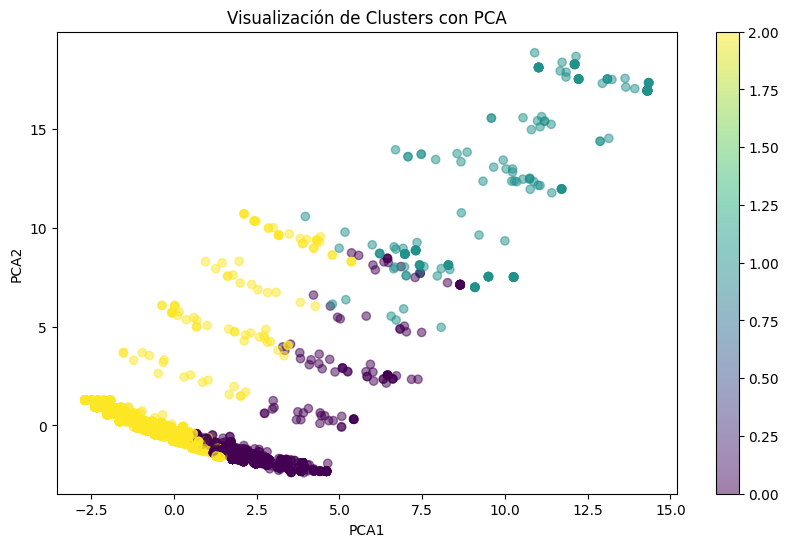

In [ ]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un dataframe con las dos componentes principales
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualización de Clusters con PCA')
plt.colorbar()
plt.show()


Validación de los Clusters

In [ ]:
# Validar los clusters utilizando técnicas como:
# - Análisis de silueta
# - Índice de Davies-Bouldin
# - Índice de Calinski-Harabasz

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(df_scaled, clusters)
print("Coeficiente de silueta:", silhouette_avg)

# Calcular el índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
print("Índice de Davies-Bouldin:", davies_bouldin)

# Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)
print("Índice de Calinski-Harabasz:", calinski_harabasz)


Coeficiente de silueta: 0.3363615639599984
Índice de Davies-Bouldin: 1.2970702571087267
Índice de Calinski-Harabasz: 2558.9288897629817


In [ ]:
#probando ver si se registran los commits en git